In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

In [ ]:
df = pd.read_excel("/content/Dataset Table 12.9.xlsx")
df = df.iloc[:,[0,1,2,3]]
df.columns = ["year","sales","inventories","ratio"]
df.index = pd.to_datetime(df['year'], format='%Y')
df.drop("year",axis=1,inplace=True)
model = ols("inventories ~ sales",data=df).fit()

In [ ]:
df.head()

,sales,inventories,ratio
year,,,
1950-01-01,46.486,84.646,1.82
1951-01-01,50.229,90.560,1.80
1952-01-01,53.501,98.145,1.83
1953-01-01,52.805,101.599,1.92
1954-01-01,55.906,102.567,1.83


In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            inventories   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     645.0
Date:                Sat, 10 Sep 2022   Prob (F-statistic):           7.21e-26
Time:                        13:51:39   Log-Likelihood:                -198.99
No. Observations:                  41   AIC:                             402.0
Df Residuals:                      39   BIC:                             405.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     66.6690     10.896      6.119      0.0

# A

In [ ]:
x = np.array(df["sales"]).reshape((-1, 1))

Text(0.2, 0.8, 'intercept: 66.669 \nslope: 1.1839')

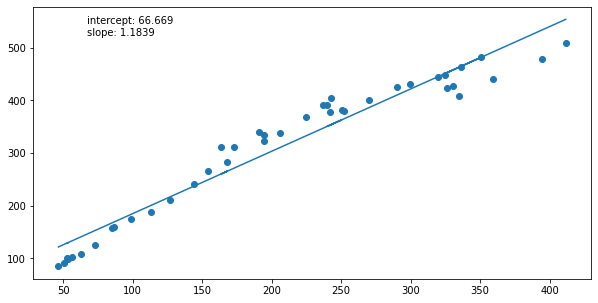

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(df["sales"],df["inventories"])
plt.plot(x,model.predict())
plt.figtext(.2,.8,f"intercept: {66.6690} \nslope: {1.1839}")

# B

In [ ]:
durbin_watson(model.resid)

0.1255528314268845

# C

In [ ]:
x=df["sales"]
y=df["inventories"]

In [ ]:
first_diff = df.diff()
first_diff.dropna(inplace=True)
first_diff.head()

In [ ]:
second_model = ols("inventories~sales",data=first_diff).fit()
second_resid = (second_model.resid)**2
second_resid.sum()
resid = (model.resid)**2
resid.sum()

dari kedua proses (differencing sekali dan tanpa differencing), kita dapatkan nilai sum of square residualnya

In [ ]:
g = second_resid.sum()/resid.sum()

In [ ]:
g

karena dl = 1.391, maka p = 1, tidak ditolak karena g < dl 

# D

Kita manfaatkan iterasi untuk n 

In [ ]:
import statsmodels.stats.diagnostic as dg

pval = 0

i=0
while pval <= .05:
  i+=1
  pval = dg.acorr_breusch_godfrey(model, nlags=i)[3]
  lval = dg.acorr_breusch_godfrey(model, nlags=i)[0]

  print(f"{i}={pval} with lambda {lval}")

print(i)

1=4.7415686558923633e-17 with lambda 34.709207716013076
2=8.699442579575034e-16 with lambda 34.709251652804554
3=4.994573337009376e-15 with lambda 34.9494254817367
4=4.056302029433657e-14 with lambda 34.99063917875573
5=3.0984622260647376e-13 with lambda 34.992881490939105
6=1.8350619062521036e-12 with lambda 35.038436493941454
7=4.5989233734921195e-12 with lambda 35.362871050007676
8=2.5710737637352375e-11 with lambda 35.36511274854027
9=3.561660339161943e-11 with lambda 35.85334735858667
10=1.3119471739492491e-10 with lambda 35.966421149453126
11=4.693364534528907e-10 with lambda 36.07050574173933
12=1.0915283049415488e-09 with lambda 36.31518250112496
13=4.185944194516769e-09 with lambda 36.36111663207784
14=1.501075269321504e-08 with lambda 36.41374214329596
15=4.782060525326516e-08 with lambda 36.495376067239704
16=1.6106395559776398e-07 with lambda 36.53781841161722
17=5.053197010403311e-07 with lambda 36.59194001928504
18=1.5817032237172827e-06 with lambda 36.62885613273248
19=4

Terlihat Pvalue lebih kecil dari α - 0.05 dari lag 1 hingga 38

sehingga h0 diterima untuk lag 1 hingga 38, maka dengan aturan parsimoni, akan kita pilih model dengan lag paling kecil, yaitu lag 1 

# E

untuk masalah ini dilakukan differencing sekali sehingga terpenuhi lag 1

In [ ]:
first_diff = df.diff()
first_diff.dropna(inplace=True)

In [ ]:
second_model = ols("inventories~sales",data=first_diff).fit()
print(second_model.summary())

                            OLS Regression Results                            
Dep. Variable:            inventories   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     57.27
Date:                Sat, 10 Sep 2022   Prob (F-statistic):           4.25e-09
Time:                        14:25:02   Log-Likelihood:                -152.48
No. Observations:                  40   AIC:                             309.0
Df Residuals:                      38   BIC:                             312.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.0562      2.442     -0.842      0.4

# F

In [ ]:
import math

In [ ]:
logdf = df

In [ ]:
logdf["sales"] = np.log(logdf["sales"])
logdf["inventories"] = np.log(logdf["inventories"])

In [ ]:
logmodel = ols("inventories ~ sales",data=logdf).fit()

In [ ]:
print(logmodel.summary())

                            OLS Regression Results                            
Dep. Variable:            inventories   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     1849.
Date:                Sat, 10 Sep 2022   Prob (F-statistic):           1.78e-34
Time:                        14:30:00   Log-Likelihood:                 46.201
No. Observations:                  41   AIC:                            -88.40
Df Residuals:                      39   BIC:                            -84.97
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3279      0.101     13.191      0.0

In [ ]:
durbin_watson(logmodel.resid)

0.22926541319061403

In [ ]:
first_diff = logdf.diff()
first_diff.dropna(inplace=True)
first_diff.head()

,sales,inventories,ratio
year,,,
1951-01-01,0.077441,0.067535,-0.02
1952-01-01,0.063108,0.080433,0.03
1953-01-01,-0.013094,0.034588,0.09
1954-01-01,0.057066,0.009483,-0.09
1955-01-01,0.119891,0.052735,-0.11


In [ ]:
second_model = ols("inventories~sales",data=first_diff).fit()
second_resid = (second_model.resid)**2
print(second_resid.sum())
resid = (logmodel.resid)**2
print(resid.sum())

0.05684403686209831
0.25208481977511554


In [ ]:
g = second_resid.sum()/resid.sum()
print(g)

0.22549567606970058


In [ ]:
import statsmodels.stats.diagnostic as dg

pval = 0

i=0
while pval <= .05:
  i+=1
  pval = dg.acorr_breusch_godfrey(logmodel, nlags=i)[3]
  lval = dg.acorr_breusch_godfrey(logmodel, nlags=i)[0]

  print(f"{i}={pval} with lambda {lval}")

print(i)

1=1.7003382494645147e-11 with lambda 28.72486042548045
2=1.8252852325575297e-10 with lambda 28.79973392924516
3=1.1524791124417455e-09 with lambda 28.925223218800284
4=1.2015631940156497e-09 with lambda 30.089573236222712
5=5.220921045525386e-09 with lambda 30.222566727078156
6=2.3973126497283368e-08 with lambda 30.234771031033638
7=9.31487426841159e-08 with lambda 30.28597054498329
8=3.3006035322635086e-07 with lambda 30.337787927237546
9=8.629515909959212e-08 with lambda 32.14122679669359
10=2.761663340708552e-07 with lambda 32.22641426222306
11=8.906152085587533e-07 with lambda 32.26546331486976
12=6.177888675398623e-07 with lambda 33.28292095479975
13=1.7974177286325893e-06 with lambda 33.354308156355884
14=5.4384708238009555e-06 with lambda 33.36607176035063
15=1.13783589609832e-05 with lambda 33.598621340069556
16=2.532275354640748e-05 with lambda 33.76659394791242
17=6.67731260523127e-05 with lambda 33.78457915310043
18=0.00017123951837061553 with lambda 33.78588503387114
19=0.0

In [ ]:
first_diff["sales"] = np.log(first_diff["sales"])
first_diff["inventories"] = np.log(first_diff["inventories"])

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
second_model = ols("inventories~sales",data=first_diff).fit()
print(second_model.summary())

                            OLS Regression Results                            
Dep. Variable:            inventories   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     19.61
Date:                Sat, 10 Sep 2022   Prob (F-statistic):           0.000132
Time:                        14:56:20   Log-Likelihood:                -37.541
No. Observations:                  30   AIC:                             79.08
Df Residuals:                      28   BIC:                             81.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2733      0.785      0.348      0.7

#G 

Bagusan Pake yang gk ln karena R^2 nya lebih bagus : 0.99648 >>> 0.979